In [1]:
import pysat
clean_level = 'none'
info = {'index': 'slt', 'kind': 'local time'}
ivm = pysat.Instrument(platform='cnofs', name='ivm',
                       orbit_info=info, clean_level=clean_level)
start = pysat.datetime(2009, 7, 8)
stop = pysat.datetime(2009, 7, 9)
ivm.bounds = (start, stop)
ivm.load(date=start)
ivm.orbits[8]
ivm.data = ivm.data.resample('1S', label='left').ffill(limit=7)

Returning cnofs ivm data for 07/08/09
Loaded Orbit:8


In [2]:
import rolling_ball as rb
import numpy as np
orbit = rb.OrbitalBallRoller(np.column_stack([ivm['slt'], ivm['ionDensity']]))
orbit.get_alpha_complex(400)
deps = orbit.locate_depletions()
alpha_arr = orbit.alpha_complex
bkg = orbit.get_background()

/home/jmsmit37/Bubble_Detection/RollingBall/rolling_ball.py:101: RuntimeWarning: invalid value encountered in sqrt
  return S / a, np.sqrt(b / a + sq_norm(S) / a**2)


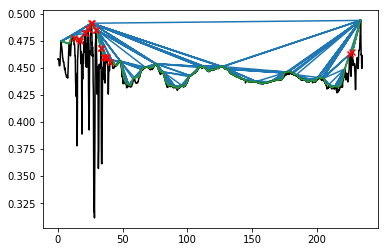

In [3]:
import matplotlib.pyplot as plt
plt.plot(orbit.points[:, 0], orbit.points[:, 1], 'k')
plt.triplot(orbit.points[:, 0], orbit.points[:, 1], alpha_arr, color='tab:blue')
plt.plot(orbit.points[bkg, 0], orbit.points[bkg, 1], color='tab:green')
plt.scatter(orbit.points[deps.flatten(), 0], orbit.points[deps.flatten(), 1], marker='x', c='r', zorder=10)
plt.show()